## 16.6 Homework

Write a program to find the minium of 
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
    
- 1, from your own code (except Monte Carlo)
- 2, from scipy

/var/folders/04/r2qmcyd17sg5xm7k2qb4cm0m0000gn/T/ipykernel_19796/3715945070.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


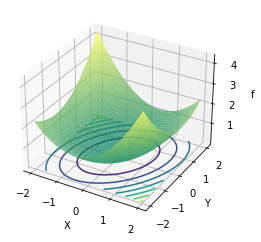

In [2]:
#Using own code

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x

def f(x,y):
    return 1/2*x**2 + 1/3*y**2 - 1/4*x*y

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()


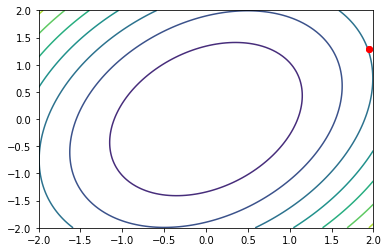

Minimum of  1.8184858245408981 found in 2 steps.


In [13]:
def gradient(f, coord, d = 0.00001):
    x = coord[0]
    y = coord[1]
    
    dfx = (f((x + d), y) - f(x, y))/d
    dfy = (f(x, (y + d)) - f(x, y))/d
    
    return np.array([dfx, dfy])

def graddescent(f, x0y0, N = 1000):
    
    xynow = x0y0
    xyprev = None
    converged = False
    xy_hist = []
    xy_hist.append(xynow)
    
    for i in range(N):
        dfnow = gradient(f, xynow)
        
        if xyprev is None:
            gamma = 0.001
        else:
            dfprev = gradient(f, xyprev)
            dfdif = dfnow - dfprev
            gamma = np.dot(xynow - xyprev, dfdif)/(np.linalg.norm(dfdif))**2
            
        xynext = xynow - gamma*dfnow
        
        
        if f(xynext[0], xynext[1]) > f(xynow[0], xynow[1]):
            coverged = True
            break
        else:
            xprev = xynow
            xynow = xynext
            xy_hist.append(xynow)
            
        return converged, np.array(xy_hist), f(xynow[0], xynow[1])

xmin, xmax = -2, 2
ymin, ymax = -2, 2

nx = np.linspace(xmin, xmax, 101)
ny = np.linspace(ymin, ymax, 101)

x, y = np.meshgrid(nx, ny)

z = f(x,y)

def xyrand(xmin, xmax, ymin, ymax):
    x0 = xmin + np.random.random()*(xmax - xmin)
    y0 = ymin + np.random.random()*(ymax - ymin)
    return [x0,y0]

x0y0 = xyrand(xmin, xmax, ymin, ymax)

coverged, xyarray, fmin = graddescent(f, x0y0, N = 1000)

plt.contour(x, y, z)
plt.plot(xyarray[:,0], xyarray[:,1], 'ro')
plt.show()

print("Minimum of ",fmin, "found in", len(xyarray), "steps.")

In [14]:
#scipy
from scipy.optimize import minimize

def scipmin(x):
    return 1/2*x[0]**2 + 1/3*x[1]**2 - 1/4*x[0]*x[1]

[x0, y0] = xyrand(xmin, xmax, ymin, ymax)

res = minimize(scipmin, [x0,y0], options = {'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7
